In [1]:
import pandas as pd

# 合并回报率文件

In [6]:
# dfs = []

# for f in ['', '1']:
#     df = pd.read_csv(f'HK_STK_DQUOTE{f}.csv')
#     df.shape
#     dfs.append(df)

# df = pd.concat(dfs)
# df.shape
# df.head(3)

In [7]:
# df.to_parquet('HK_STK_DQUOTE.pq')

# 计算行业指数

## A股

In [5]:
df = pd.read_parquet('TRD_Dalyr.pq', columns=['Stkcd', 'Trddt', 'Dretwd', 'Dsmvosd'])
df.shape
df.head(3)

(2348812, 4)

,Stkcd,Trddt,Dretwd,Dsmvosd
0,2,2021-08-02,0.011617,2.030969e+08
1,2,2021-08-03,-0.000957,2.029025e+08
2,2,2021-08-04,-0.015805,1.996957e+08


In [6]:
cp = pd.read_csv('TRD_Co.csv')[['Stkcd', 'Nindcd']]
cp.shape
cp.head(3)

(5615, 2)

,Stkcd,Nindcd
0,1,I01
1,2,J
2,3,M


In [7]:
dfm = df.merge(cp, on=['Stkcd'])
dfm.shape
dfm.head(3)

(2348812, 5)

,Stkcd,Trddt,Dretwd,Dsmvosd,Nindcd
0,2,2021-08-02,0.011617,2.030969e+08,J
1,2,2021-08-03,-0.000957,2.029025e+08,J
2,2,2021-08-04,-0.015805,1.996957e+08,J


In [8]:
dfm['wgt_ret'] = dfm['Dretwd'] * dfm['Dsmvosd']

In [9]:
dfg = dfm.groupby(['Trddt', 'Nindcd'])[['wgt_ret', 'Dsmvosd']].sum()
dfg['wgt_ret'] /= dfg['Dsmvosd']
dfg.reset_index(inplace=True)
dfg.drop(columns=['Dsmvosd'], inplace=True)
dfg.head(3)

,Trddt,Nindcd,wgt_ret
0,2021-08-02,A01,0.021642
1,2021-08-02,A03,0.024285
2,2021-08-02,A05,0.052642


In [10]:
dfg.to_parquet('Ind_Ret_A.pq')

## H股

In [11]:
# df = pd.read_parquet('HK_STK_DQUOTE.pq', columns=['TradingDate', 'Symbol', ''])  # 缺市值
# df.shape
# df.head(3)

# Beta

In [12]:
mm = pd.read_excel('大模型汇总v2.xlsx')
mm.shape
mm.head(3)

(134, 11)

,Unnamed: 0,发布时间,公司,股票代码,大模型名称,单位类型,地点,省,开源与否,大模型类型,备注
0,1.0,2023-03-16 00:00:00,百度,9888.HK,文心一言,公司,北京,北京,否,通用,260B，中文语料75~85%
1,2.0,2023-05-06 00:00:00,科大讯飞,002230,星火,公司,合肥,安徽,否,通用,170B
2,3.0,2023-07-07 00:00:00,达观数据,NaN,曹植,公司,上海,上海,否,金融,50%各行业混合语料+50%垂直专用语料，to B，50B+


In [13]:
mm2 = mm[['发布时间', '股票代码', '公司', '大模型名称']].copy()
mm2.columns = ['EvtDate', 'Stkcd', 'company', 'llm']
mm2.dropna(inplace=True)
mm2 = mm2.loc[mm2['Stkcd'].astype(str).str.isnumeric()]
mm2['Stkcd'] = mm2['Stkcd'].astype(int)
mm2.shape
mm2.head()

(25, 4)

,EvtDate,Stkcd,company,llm
1,2023-05-06 00:00:00,2230,科大讯飞,星火
23,2023-06-13 00:00:00,601360,360,"智脑,一见"
34,2023-05-26 00:00:00,688031,星环科技,无涯、求索
36,2023-06-28 00:00:00,600570,恒生电子,LightGPT
45,2023-05-27 00:00:00,300688,创业黑马,天启


In [14]:
mm3 = mm2.merge(cp, on=['Stkcd'])
mm3.shape
mm3

(25, 5)

,EvtDate,Stkcd,company,llm,Nindcd
0,2023-05-06 00:00:00,2230,科大讯飞,星火,G87
1,2023-06-13 00:00:00,601360,360,"智脑,一见",G87
2,2023-05-26 00:00:00,688031,星环科技,无涯、求索,G87
3,2023-06-28 00:00:00,600570,恒生电子,LightGPT,G87
4,2023-05-27 00:00:00,300688,创业黑马,天启,K99
5,2023-04-17 00:00:00,300418,昆仑万维,天工,G87
6,2023-07-03 00:00:00,300229,拓尔思,拓天,G87
7,2023-05-18 00:00:00,688327,云从科技,从容,G87
8,2023-04-28 00:00:00,601728,电信智科,星河,G85
9,2023-07-06 00:00:00,601728,中国电信,TeleChat,G85


In [15]:
mm4 = mm3.merge(df, on=['Stkcd'])
mm4.shape
mm4.head(3)

(11282, 8)

,EvtDate,Stkcd,company,llm,Nindcd,Trddt,Dretwd,Dsmvosd
0,2023-05-06 00:00:00,2230,科大讯飞,星火,G87,2021-08-02,0.025597,1.247335e+08
1,2023-05-06 00:00:00,2230,科大讯飞,星火,G87,2021-08-03,-0.011814,1.232600e+08
2,2023-05-06 00:00:00,2230,科大讯飞,星火,G87,2021-08-04,0.003368,1.236750e+08


In [16]:
mm4 = mm4.merge(dfg, on=['Nindcd', 'Trddt'])
mm4.shape
mm4.head(3)

(11282, 9)

,EvtDate,Stkcd,company,llm,Nindcd,Trddt,Dretwd,Dsmvosd,wgt_ret
0,2023-05-06 00:00:00,2230,科大讯飞,星火,G87,2021-08-02,0.025597,1.247335e+08,0.022075
1,2023-06-13 00:00:00,601360,360,"智脑,一见",G87,2021-08-02,0.030151,8.788797e+07,0.022075
2,2023-06-28 00:00:00,600570,恒生电子,LightGPT,G87,2021-08-02,-0.010411,8.057583e+07,0.022075


In [17]:
mm4.rename(columns={'Dretwd': 'ret', 'Dsmvosd': 'mv', 'wgt_ret': 'idx_ret'}, inplace=True)
mm4.drop(columns=['Nindcd'], inplace=True)
mm4.shape
mm4.head(3)

(11282, 8)

,EvtDate,Stkcd,company,llm,Trddt,ret,mv,idx_ret
0,2023-05-06 00:00:00,2230,科大讯飞,星火,2021-08-02,0.025597,1.247335e+08,0.022075
1,2023-06-13 00:00:00,601360,360,"智脑,一见",2021-08-02,0.030151,8.788797e+07,0.022075
2,2023-06-28 00:00:00,600570,恒生电子,LightGPT,2021-08-02,-0.010411,8.057583e+07,0.022075


In [18]:
mm4['Trddt'] = pd.to_datetime(mm4['Trddt'])
mm4['EvtDate'] = pd.to_datetime(mm4['EvtDate'])

In [19]:
mm4['date_diff'] = (mm4['Trddt'] - mm4['EvtDate']).dt.days
mm4.head(3)

,EvtDate,Stkcd,company,llm,Trddt,ret,mv,idx_ret,date_diff
0,2023-05-06,2230,科大讯飞,星火,2021-08-02,0.025597,1.247335e+08,0.022075,-642
1,2023-06-13,601360,360,"智脑,一见",2021-08-02,0.030151,8.788797e+07,0.022075,-680
2,2023-06-28,600570,恒生电子,LightGPT,2021-08-02,-0.010411,8.057583e+07,0.022075,-695


In [20]:
bt = mm4.loc[mm4['date_diff'].between(-365, -30)].copy()
bt.shape
bt.head(3)

(5320, 9)

,EvtDate,Stkcd,company,llm,Trddt,ret,mv,idx_ret,date_diff
2043,2023-04-17,300418,昆仑万维,天工,2022-04-18,-0.007895,15865388.79,0.008438,-364
2055,2023-04-17,300418,昆仑万维,天工,2022-04-19,0.005968,15960076.13,-0.001002,-363
2067,2023-04-17,300418,昆仑万维,天工,2022-04-20,-0.009229,15812784.72,-0.008217,-362


In [21]:
dct = {}

for stkcd in bt['Stkcd'].unique():
    tmp = bt.loc[bt['Stkcd'] == stkcd]
    A = np.vstack([tmp['idx_ret'], np.ones(len(tmp))]).T
    y = tmp['ret']
    beta, alpha = np.linalg.lstsq(A, y, rcond=None)[0]
    dct[stkcd] = beta

In [22]:
et = mm4.loc[mm4['date_diff'].between(-20, 20)].copy()
et.shape
et.head(3)

(681, 9)

,EvtDate,Stkcd,company,llm,Trddt,ret,mv,idx_ret,date_diff
5116,2023-04-17,300418,昆仑万维,天工,2023-03-28,-0.098940,41065828.60,-0.012707,-20
5130,2023-04-17,300418,昆仑万维,天工,2023-03-29,-0.017516,40346505.59,0.004794,-19
5144,2023-04-17,300418,昆仑万维,天工,2023-03-30,0.037786,41871040.93,-0.012980,-18


In [23]:
et['beta'] = et['Stkcd'].map(dct)
et.head(3)

,EvtDate,Stkcd,company,llm,Trddt,ret,mv,idx_ret,date_diff,beta
5116,2023-04-17,300418,昆仑万维,天工,2023-03-28,-0.098940,41065828.60,-0.012707,-20,1.002701
5130,2023-04-17,300418,昆仑万维,天工,2023-03-29,-0.017516,40346505.59,0.004794,-19,1.002701
5144,2023-04-17,300418,昆仑万维,天工,2023-03-30,0.037786,41871040.93,-0.012980,-18,1.002701


In [24]:
et['exc_ret'] = et['ret'] - et['idx_ret']
et['adj_ret'] = et['ret'] - et['idx_ret'] * et['beta']
et.head(3)

,EvtDate,Stkcd,company,llm,Trddt,ret,mv,idx_ret,date_diff,beta,exc_ret,adj_ret
5116,2023-04-17,300418,昆仑万维,天工,2023-03-28,-0.098940,41065828.60,-0.012707,-20,1.002701,-0.086233,-0.086199
5130,2023-04-17,300418,昆仑万维,天工,2023-03-29,-0.017516,40346505.59,0.004794,-19,1.002701,-0.022310,-0.022322
5144,2023-04-17,300418,昆仑万维,天工,2023-03-30,0.037786,41871040.93,-0.012980,-18,1.002701,0.050766,0.050801


In [25]:
et.sort_values(['Stkcd', 'date_diff'], inplace=True)
et['Exc_ret'] = et['exc_ret'] + 1
et['Adj_ret'] = et['adj_ret'] + 1
et['cum_exc_ret'] = et.groupby(['Stkcd'])['Exc_ret'].cumprod() - 1
et['cum_adj_ret'] = et.groupby(['Stkcd'])['Adj_ret'].cumprod() - 1

In [36]:
et.to_csv('event_returns.csv', index=False)

In [26]:
et.drop_duplicates(subset=['Stkcd'], keep='last').sort_values(['cum_adj_ret'])

,EvtDate,Stkcd,company,llm,Trddt,ret,mv,idx_ret,date_diff,beta,exc_ret,adj_ret,Exc_ret,Adj_ret,cum_exc_ret,cum_adj_ret
5818,2023-05-18,688327,云从科技,从容,2023-06-07,0.033217,1.575740e+07,0.013650,20,1.795148,0.019567,0.008713,1.019567,1.008713,-0.231462,-0.290790
6225,2023-06-28,300188,美亚柏科,天擎,2023-07-18,-0.044547,1.351442e+07,-0.016039,20,1.123723,-0.028508,-0.026523,0.971492,0.973477,-0.218721,-0.214424
6053,2023-06-13,601360,360,"智脑,一见",2023-07-03,-0.010367,8.867396e+07,-0.011384,20,1.267379,0.001017,0.004061,1.001017,1.004061,-0.131287,-0.148565
10491,2023-07-06,32,中国电子云,星智,2023-07-26,-0.018973,1.933647e+07,-0.001272,20,0.695514,-0.017701,-0.018088,0.982299,0.981912,-0.155764,-0.146569
6241,2023-06-29,600728,佳都科技,佳都知行,2023-07-19,0.001623,1.071931e+07,0.004977,20,0.804831,-0.003354,-0.002383,0.996646,0.997617,-0.132012,-0.135529
11044,2023-07-25,301312,今立方,人社12333智能政务,2023-08-14,-0.023429,1.324788e+06,-0.001321,20,1.700641,-0.022108,-0.021183,0.977892,0.978817,-0.164430,-0.120160
6267,2023-07-03,300229,拓尔思,拓天,2023-07-21,-0.004803,1.811076e+07,-0.008133,18,1.557143,0.003330,0.007861,1.003330,1.007861,-0.152850,-0.113468
8490,2023-07-06,601728,中国电信,TeleChat,2023-07-26,-0.018900,1.118613e+08,-0.018713,20,1.084166,-0.000187,0.001388,0.999813,1.001388,-0.101893,-0.094450
5714,2023-05-09,2373,宇视科技,梧桐,2023-05-29,0.018684,1.722376e+07,0.006975,20,1.010097,0.011709,0.011638,1.011709,1.011638,-0.094775,-0.094362
6220,2023-06-28,600570,恒生电子,LightGPT,2023-07-18,-0.014875,7.172524e+07,-0.016039,20,0.991019,0.001164,0.001020,1.001164,1.001020,-0.081995,-0.082293


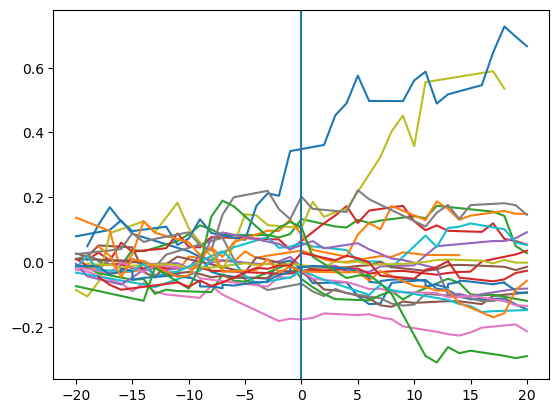

In [27]:
_ = plt.figure()
for stkcd in et['Stkcd'].unique():
    tmp = et.loc[et['Stkcd'] == stkcd]
    _ = plt.plot(tmp['date_diff'], tmp['cum_adj_ret'])

_ = plt.axvline(0)
_ = plt.show()

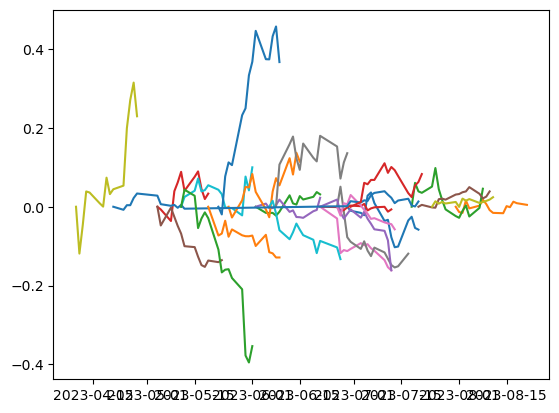

In [35]:
_ = plt.figure()
for stkcd in et['Stkcd'].unique():
    tmp = et.loc[(et['Stkcd'] == stkcd) & (et['date_diff'].between(-7, 14))].sort_values(['Trddt'])
    tmp['cum_adj_ret'] = tmp['Adj_ret'].cumprod() - 1
    _ = plt.plot(tmp['Trddt'], tmp['cum_adj_ret'].shift().fillna(0))

# _ = plt.axvline(0)
_ = plt.show()

In [108]:
pn = []

for d in range(-20, 21):
    for s in et['Stkcd'].unique():
        pn.append((s, d))
pn = pd.DataFrame(pn, columns=['Stkcd', 'date_diff'])
pn.shape

(984, 2)

In [112]:
etm = et.merge(pn, on=['Stkcd', 'date_diff'], how='outer').sort_values(['Stkcd', 'date_diff'])
etm['cum_exc_ret'] = etm.groupby(['Stkcd'])['cum_exc_ret'].ffill()
etm['cum_adj_ret'] = etm.groupby(['Stkcd'])['cum_adj_ret'].ffill()
etm.head(5)

,EvtDate,Stkcd,company,llm,Trddt,ret,mv,idx_ret,date_diff,beta,exc_ret,adj_ret,Exc_ret,Adj_ret,cum_exc_ret,cum_adj_ret
0,2023-07-06,32,中国电子云,星智,2023-06-16,0.100116,24372072.06,0.030116,-20,0.695514,0.070000,0.079170,1.070000,1.079170,0.070000,0.079170
688,NaT,32,NaN,NaN,NaT,NaN,NaN,NaN,-19,NaN,NaN,NaN,NaN,NaN,0.070000,0.079170
700,NaT,32,NaN,NaN,NaT,NaN,NaN,NaN,-18,NaN,NaN,NaN,NaN,NaN,0.070000,0.079170
1,2023-07-06,32,中国电子云,星智,2023-06-19,0.002646,24436548.44,-0.022548,-17,0.695514,0.025194,0.018328,1.025194,1.018328,0.096958,0.098950
2,2023-07-06,32,中国电子云,星智,2023-06-20,0.017150,24855644.91,-0.014104,-16,0.695514,0.031254,0.026959,1.031254,1.026959,0.131242,0.128576


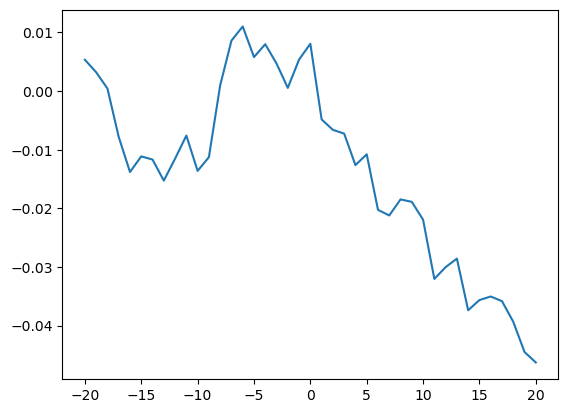

In [114]:
etg = etm.loc[~etm['Stkcd'].isin([300418, 300688])].groupby(['date_diff']).agg({'cum_exc_ret': 'mean', 'cum_adj_ret': 'mean', 'Stkcd': 'nunique'})
# etg = etg.loc[etg['Stkcd'] >= 20]
_ = plt.plot(etg['cum_adj_ret'])